## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0   2.357168   922.189241  0.448194  3.709561  1.644530
1  92.781575   259.781459  0.846489  1.608303  1.104099
2   3.253004  1393.370182  0.394036  9.870215  1.225782
3  58.391818  1249.285116  0.125685  7.940503  1.047218
4  68.714016  1706.002231  0.710035  4.581075  1.572538


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.44332 | train_mse: 4.12883 | train_mae: 1.63581 |  0:00:00s
epoch 1  | loss: 0.78188 | train_mse: 2.84107 | train_mae: 1.28467 |  0:00:00s
epoch 2  | loss: 0.50525 | train_mse: 1.37211 | train_mae: 0.90365 |  0:00:00s


epoch 3  | loss: 0.54607 | train_mse: 0.89565 | train_mae: 0.71384 |  0:00:00s
epoch 4  | loss: 0.49441 | train_mse: 1.33154 | train_mae: 0.83593 |  0:00:00s


epoch 5  | loss: 0.47755 | train_mse: 1.93674 | train_mae: 0.93299 |  0:00:00s
epoch 6  | loss: 0.47763 | train_mse: 1.33411 | train_mae: 0.8355  |  0:00:00s
epoch 7  | loss: 0.44453 | train_mse: 0.99876 | train_mae: 0.71145 |  0:00:01s


epoch 8  | loss: 0.33445 | train_mse: 0.89082 | train_mae: 0.68364 |  0:00:01s
epoch 9  | loss: 0.394   | train_mse: 0.88166 | train_mae: 0.69302 |  0:00:01s
epoch 10 | loss: 0.44074 | train_mse: 0.92791 | train_mae: 0.69844 |  0:00:01s


epoch 11 | loss: 0.41803 | train_mse: 0.60734 | train_mae: 0.56965 |  0:00:01s
epoch 12 | loss: 0.34531 | train_mse: 0.56243 | train_mae: 0.54428 |  0:00:01s
epoch 13 | loss: 0.25435 | train_mse: 0.63424 | train_mae: 0.56753 |  0:00:01s


epoch 14 | loss: 0.36131 | train_mse: 0.63838 | train_mae: 0.5559  |  0:00:01s
epoch 15 | loss: 0.16415 | train_mse: 0.4144  | train_mae: 0.48068 |  0:00:01s
epoch 16 | loss: 0.35555 | train_mse: 0.35287 | train_mae: 0.44899 |  0:00:01s


epoch 17 | loss: 0.30216 | train_mse: 0.27293 | train_mae: 0.42153 |  0:00:01s
epoch 18 | loss: 0.13835 | train_mse: 0.19909 | train_mae: 0.36097 |  0:00:02s
epoch 19 | loss: 0.22694 | train_mse: 0.16674 | train_mae: 0.31739 |  0:00:02s


epoch 20 | loss: 0.18039 | train_mse: 0.23993 | train_mae: 0.37422 |  0:00:02s
epoch 21 | loss: 0.23297 | train_mse: 0.1777  | train_mae: 0.32479 |  0:00:02s
epoch 22 | loss: 0.18705 | train_mse: 0.184   | train_mae: 0.33645 |  0:00:02s


epoch 23 | loss: 0.18123 | train_mse: 0.21216 | train_mae: 0.34835 |  0:00:02s
epoch 24 | loss: 0.25007 | train_mse: 0.21155 | train_mae: 0.33495 |  0:00:02s
epoch 25 | loss: 0.29977 | train_mse: 0.18942 | train_mae: 0.32821 |  0:00:02s


epoch 26 | loss: 0.16871 | train_mse: 0.1911  | train_mae: 0.32261 |  0:00:02s
epoch 27 | loss: 0.18984 | train_mse: 0.15778 | train_mae: 0.29374 |  0:00:02s
epoch 28 | loss: 0.23878 | train_mse: 0.2096  | train_mae: 0.32872 |  0:00:02s


epoch 29 | loss: 0.17344 | train_mse: 0.19685 | train_mae: 0.3318  |  0:00:02s
epoch 30 | loss: 0.24581 | train_mse: 0.12829 | train_mae: 0.28693 |  0:00:03s
epoch 31 | loss: 0.16259 | train_mse: 0.10701 | train_mae: 0.25712 |  0:00:03s


epoch 32 | loss: 0.15262 | train_mse: 0.11758 | train_mae: 0.26883 |  0:00:03s
epoch 33 | loss: 0.12484 | train_mse: 0.14564 | train_mae: 0.28832 |  0:00:03s
epoch 34 | loss: 0.2326  | train_mse: 0.23481 | train_mae: 0.33634 |  0:00:03s


epoch 35 | loss: 0.22665 | train_mse: 0.33469 | train_mae: 0.36702 |  0:00:03s
epoch 36 | loss: 0.20863 | train_mse: 0.31182 | train_mae: 0.33472 |  0:00:03s
epoch 37 | loss: 0.35676 | train_mse: 0.31377 | train_mae: 0.33217 |  0:00:03s


epoch 38 | loss: 0.42559 | train_mse: 0.22381 | train_mae: 0.324   |  0:00:03s
epoch 39 | loss: 0.25027 | train_mse: 0.26319 | train_mae: 0.34069 |  0:00:03s
epoch 40 | loss: 0.17757 | train_mse: 0.29548 | train_mae: 0.36885 |  0:00:03s


epoch 41 | loss: 0.24398 | train_mse: 0.34353 | train_mae: 0.40839 |  0:00:04s
epoch 42 | loss: 0.29556 | train_mse: 0.2864  | train_mae: 0.36964 |  0:00:04s
epoch 43 | loss: 0.22009 | train_mse: 0.27171 | train_mae: 0.35805 |  0:00:04s


epoch 44 | loss: 0.12684 | train_mse: 0.24759 | train_mae: 0.33284 |  0:00:04s
epoch 45 | loss: 0.13661 | train_mse: 0.20084 | train_mae: 0.31007 |  0:00:04s
epoch 46 | loss: 0.22088 | train_mse: 0.23653 | train_mae: 0.35205 |  0:00:04s


epoch 47 | loss: 0.23308 | train_mse: 0.32025 | train_mae: 0.41009 |  0:00:04s
epoch 48 | loss: 0.19691 | train_mse: 0.20241 | train_mae: 0.33424 |  0:00:04s
epoch 49 | loss: 0.16844 | train_mse: 0.17446 | train_mae: 0.29871 |  0:00:04s


epoch 50 | loss: 0.11505 | train_mse: 0.17689 | train_mae: 0.30127 |  0:00:04s
epoch 51 | loss: 0.09223 | train_mse: 0.18553 | train_mae: 0.30462 |  0:00:04s
epoch 52 | loss: 0.31436 | train_mse: 0.22573 | train_mae: 0.33688 |  0:00:04s


epoch 53 | loss: 0.2099  | train_mse: 0.25001 | train_mae: 0.35161 |  0:00:05s
epoch 54 | loss: 0.3994  | train_mse: 0.32183 | train_mae: 0.38875 |  0:00:05s
epoch 55 | loss: 0.22884 | train_mse: 0.25431 | train_mae: 0.35159 |  0:00:05s


epoch 56 | loss: 0.18295 | train_mse: 0.17575 | train_mae: 0.30496 |  0:00:05s
epoch 57 | loss: 0.24943 | train_mse: 0.0955  | train_mae: 0.23565 |  0:00:05s
epoch 58 | loss: 0.10555 | train_mse: 0.07582 | train_mae: 0.20115 |  0:00:05s


epoch 59 | loss: 0.23646 | train_mse: 0.07333 | train_mae: 0.20175 |  0:00:05s
epoch 60 | loss: 0.15157 | train_mse: 0.08013 | train_mae: 0.21367 |  0:00:05s
epoch 61 | loss: 0.12278 | train_mse: 0.09085 | train_mae: 0.22706 |  0:00:05s


epoch 62 | loss: 0.1422  | train_mse: 0.08061 | train_mae: 0.21491 |  0:00:05s
epoch 63 | loss: 0.08408 | train_mse: 0.06365 | train_mae: 0.18598 |  0:00:05s
epoch 64 | loss: 0.14324 | train_mse: 0.06273 | train_mae: 0.1862  |  0:00:05s


epoch 65 | loss: 0.11436 | train_mse: 0.0621  | train_mae: 0.18881 |  0:00:06s
epoch 66 | loss: 0.1127  | train_mse: 0.05823 | train_mae: 0.18156 |  0:00:06s
epoch 67 | loss: 0.09846 | train_mse: 0.05409 | train_mae: 0.1798  |  0:00:06s


epoch 68 | loss: 0.11742 | train_mse: 0.05741 | train_mae: 0.18366 |  0:00:06s
epoch 69 | loss: 0.1951  | train_mse: 0.06514 | train_mae: 0.19639 |  0:00:06s
epoch 70 | loss: 0.13888 | train_mse: 0.07054 | train_mae: 0.20185 |  0:00:06s


epoch 71 | loss: 0.20012 | train_mse: 0.0734  | train_mae: 0.21048 |  0:00:06s
epoch 72 | loss: 0.27564 | train_mse: 0.07382 | train_mae: 0.21388 |  0:00:06s
epoch 73 | loss: 0.24824 | train_mse: 0.06923 | train_mae: 0.20574 |  0:00:06s


epoch 74 | loss: 0.11961 | train_mse: 0.06346 | train_mae: 0.19045 |  0:00:06s
epoch 75 | loss: 0.10483 | train_mse: 0.06717 | train_mae: 0.19778 |  0:00:06s
epoch 76 | loss: 0.10024 | train_mse: 0.06723 | train_mae: 0.20189 |  0:00:06s


epoch 77 | loss: 0.10638 | train_mse: 0.06765 | train_mae: 0.20089 |  0:00:07s
epoch 78 | loss: 0.10278 | train_mse: 0.06884 | train_mae: 0.19842 |  0:00:07s


epoch 79 | loss: 0.13678 | train_mse: 0.0686  | train_mae: 0.19338 |  0:00:07s
epoch 80 | loss: 0.16819 | train_mse: 0.08448 | train_mae: 0.22565 |  0:00:07s
epoch 81 | loss: 0.11787 | train_mse: 0.10739 | train_mae: 0.25762 |  0:00:07s


epoch 82 | loss: 0.31614 | train_mse: 0.0988  | train_mae: 0.24595 |  0:00:07s
epoch 83 | loss: 0.11859 | train_mse: 0.07584 | train_mae: 0.2144  |  0:00:07s


epoch 84 | loss: 0.09741 | train_mse: 0.07093 | train_mae: 0.20416 |  0:00:07s
epoch 85 | loss: 0.12299 | train_mse: 0.07402 | train_mae: 0.21396 |  0:00:07s
epoch 86 | loss: 0.1212  | train_mse: 0.06175 | train_mae: 0.19664 |  0:00:07s


epoch 87 | loss: 0.25565 | train_mse: 0.07249 | train_mae: 0.21341 |  0:00:08s
epoch 88 | loss: 0.07287 | train_mse: 0.07227 | train_mae: 0.21019 |  0:00:08s
epoch 89 | loss: 0.08932 | train_mse: 0.07071 | train_mae: 0.20745 |  0:00:08s


epoch 90 | loss: 0.14686 | train_mse: 0.07354 | train_mae: 0.21123 |  0:00:08s
epoch 91 | loss: 0.32224 | train_mse: 0.07181 | train_mae: 0.20506 |  0:00:08s
epoch 92 | loss: 0.12179 | train_mse: 0.07393 | train_mae: 0.20486 |  0:00:08s


epoch 93 | loss: 0.11049 | train_mse: 0.06388 | train_mae: 0.19544 |  0:00:08s
epoch 94 | loss: 0.12535 | train_mse: 0.07288 | train_mae: 0.21584 |  0:00:08s
epoch 95 | loss: 0.16054 | train_mse: 0.10031 | train_mae: 0.23785 |  0:00:08s


epoch 96 | loss: 0.09281 | train_mse: 0.14799 | train_mae: 0.27029 |  0:00:08s
epoch 97 | loss: 0.09657 | train_mse: 0.141   | train_mae: 0.26388 |  0:00:08s
epoch 98 | loss: 0.10776 | train_mse: 0.10118 | train_mae: 0.22975 |  0:00:08s


epoch 99 | loss: 0.07784 | train_mse: 0.09497 | train_mae: 0.22198 |  0:00:09s
epoch 100| loss: 0.14188 | train_mse: 0.06829 | train_mae: 0.19706 |  0:00:09s
epoch 101| loss: 0.08858 | train_mse: 0.0664  | train_mae: 0.19684 |  0:00:09s


epoch 102| loss: 0.14158 | train_mse: 0.06841 | train_mae: 0.20403 |  0:00:09s
epoch 103| loss: 0.14541 | train_mse: 0.07011 | train_mae: 0.20439 |  0:00:09s
epoch 104| loss: 0.07734 | train_mse: 0.08369 | train_mae: 0.21869 |  0:00:09s


epoch 105| loss: 0.11912 | train_mse: 0.09326 | train_mae: 0.22386 |  0:00:09s
epoch 106| loss: 0.07038 | train_mse: 0.09079 | train_mae: 0.22356 |  0:00:09s
epoch 107| loss: 0.08341 | train_mse: 0.07829 | train_mae: 0.21122 |  0:00:09s


epoch 108| loss: 0.10076 | train_mse: 0.06641 | train_mae: 0.19224 |  0:00:09s
epoch 109| loss: 0.16799 | train_mse: 0.07143 | train_mae: 0.20032 |  0:00:09s
epoch 110| loss: 0.10119 | train_mse: 0.07328 | train_mae: 0.20014 |  0:00:09s


epoch 111| loss: 0.08273 | train_mse: 0.08465 | train_mae: 0.21498 |  0:00:10s
epoch 112| loss: 0.14052 | train_mse: 0.09793 | train_mae: 0.23103 |  0:00:10s
epoch 113| loss: 0.10268 | train_mse: 0.09292 | train_mae: 0.23271 |  0:00:10s


epoch 114| loss: 0.1459  | train_mse: 0.09334 | train_mae: 0.23348 |  0:00:10s
epoch 115| loss: 0.11168 | train_mse: 0.08056 | train_mae: 0.21631 |  0:00:10s
epoch 116| loss: 0.12048 | train_mse: 0.05707 | train_mae: 0.18276 |  0:00:10s


epoch 117| loss: 0.09882 | train_mse: 0.06271 | train_mae: 0.18887 |  0:00:10s

Early stopping occurred at epoch 117 with best_epoch = 67 and best_train_mae = 0.1798
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

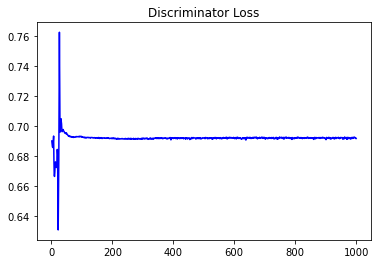

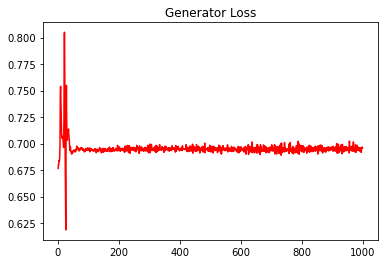

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.36297334079557264


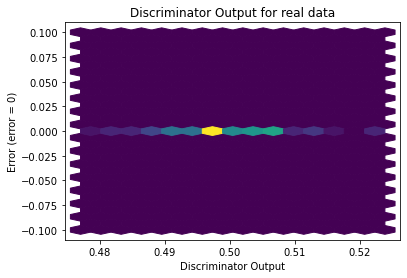

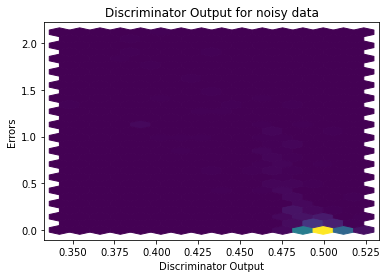

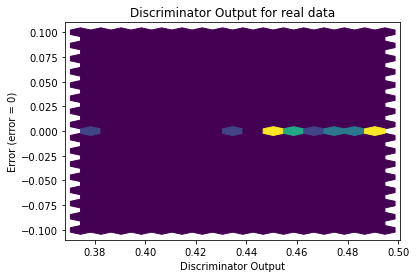

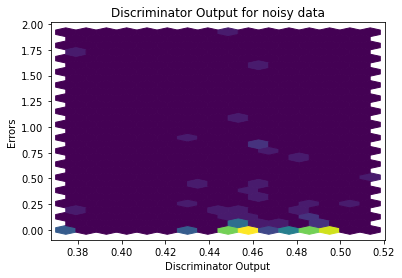

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


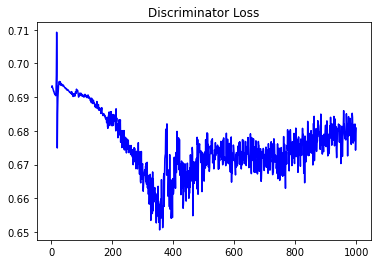

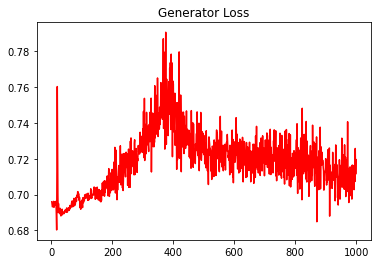

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.37883204985612723


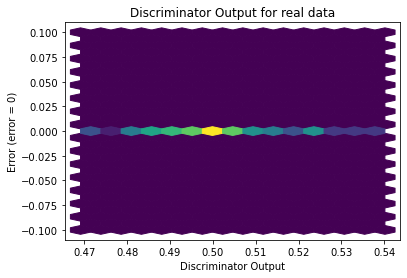

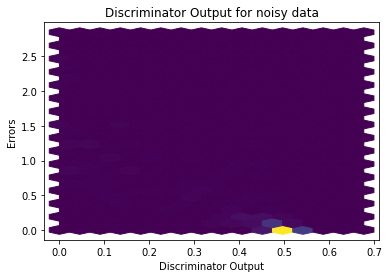

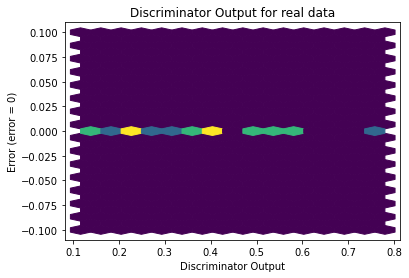

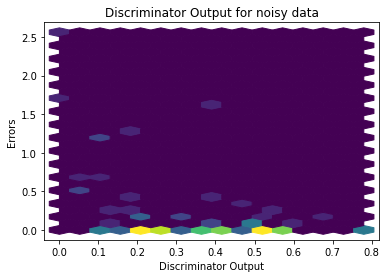

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2318]], requires_grad=True)
